## แบบฝึกหัดเขียนโปรแกรมครั้งที่ 6
### Logistic Regression

1. เขียนโปรแกรมสำหรับสร้างแบบจำลอง logistic regression ด้วยวิธี gradient descent สำหรับแก้ปัญหา logic AND, OR และ XOR (สำหรับปัญหา XOR ต้องใช้ interaction feature)

- เพิ่ม plot decision boundary ของ logistic regression ออกมา

In [4]:
import numpy as np

## Sigmoid Function

สูตร sigmoid function 

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

## Cost Function 

สูตร cost function  $J(\theta)$  สำหรับ logistic regression 

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

เมื่อ $h_\theta(x) = \sigma(\theta^T x)$  เป็นค่าฟังก์ชันที่ใช้ sigmoid 

## Gradient Descent Function

สูตร update weight ด้วย Gradient descent 

$$
\theta := \theta - \frac{\alpha}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)}
$$




In [5]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function for logistic regression
def logistic_cost_function(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = (-1/m) * (np.dot(y, np.log(h)) + np.dot((1-y), np.log(1-h)))
    return cost

# Gradient Descent function
def gradient_descent_binary(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for _ in range(iterations):
        h = sigmoid(np.dot(X, weights))
        weights -= (learning_rate / m) * np.dot(X.T, (h - y))
        cost = logistic_cost_function(X, y, weights)
        cost_history.append(cost)
    
    return weights, cost_history


- Prepare the Datasets for AND, OR, and XOR

In [6]:
# AND dataset
X_and = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y_and = np.array([0, 0, 0, 1])

# Input: (0, 0) -> AND -> Output: 0
# Input: (0, 1) -> AND -> Output: 0
# Input: (1, 0) -> AND -> Output: 0
# Input: (1, 1) -> AND -> Output: 1
# Output: 0, 0, 0, 1

# OR dataset
X_or = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y_or = np.array([0, 1, 1, 1])

# Input: (0, 0) -> OR -> Output: 0
# Input: (0, 1) -> OR -> Output: 1
# Input: (1, 0) -> OR -> Output: 1
# Input: (1, 1) -> OR -> Output: 1

# XOR dataset
X_xor = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y_xor = np.array([0, 1, 1, 0])
# Input: (0, 0) -> XOR -> Output: 0
# Input: (0, 1) -> XOR -> Output: 1
# Input: (1, 0) -> XOR -> Output: 1
# Input: (1, 1) -> XOR -> Output: 0

- Plot decision boundary

In [8]:
import matplotlib.pyplot as plt

# Plotting decision boundary
def plot_decision_boundary(X, y, weights, title):
    plt.figure()
    
    # Define the plot limits
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    
    # Check if the weights include interaction terms (i.e., XOR case)
    if weights.shape[0] == 4:
        # Create grid for XOR interaction feature
        X_grid = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel(), (xx.ravel() * yy.ravel())]
    else:
        # Create grid for AND/OR
        X_grid = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]
        
    Z = sigmoid(np.dot(X_grid, weights))
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=2)
    
    # Scatter plot
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', marker='o', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

- Train and Test the Model

AND Predictions: [False False False  True]


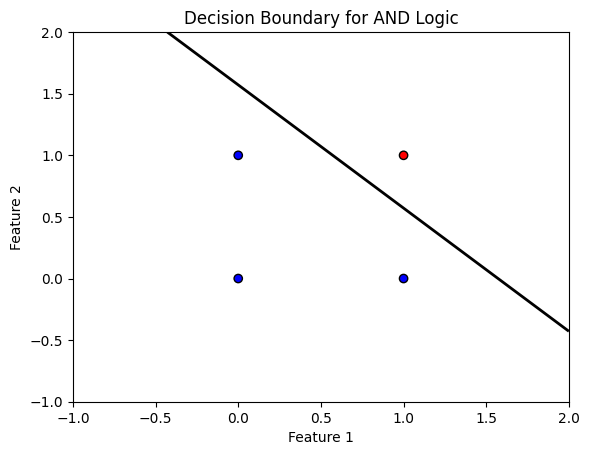

OR Predictions: [False  True  True  True]


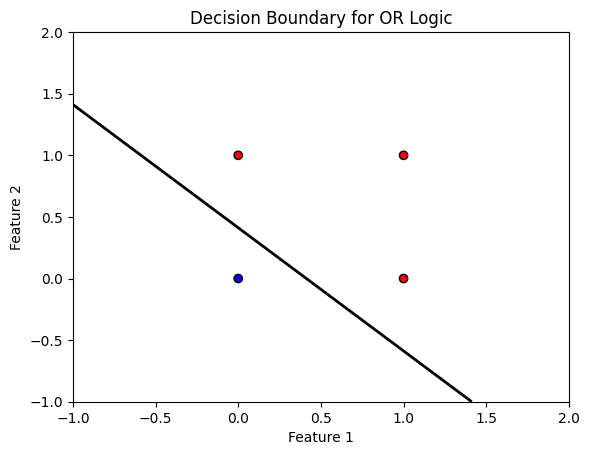

XOR Predictions: [False  True  True False]


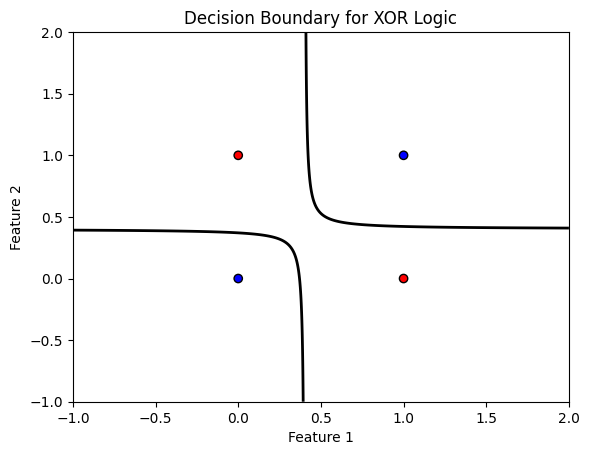

In [9]:
# Initial weights
initial_weights = np.zeros(X_and.shape[1])

# Train AND Logic
weights_and, cost_history_and = gradient_descent_binary(X_and, y_and, initial_weights, learning_rate=0.1, iterations=1000)
print("AND Predictions:", sigmoid(np.dot(X_and, weights_and)) >= 0.5)
plot_decision_boundary(X_and, y_and, weights_and, 'Decision Boundary for AND Logic')

# Train OR Logic
weights_or, cost_history_or = gradient_descent_binary(X_or, y_or, initial_weights, learning_rate=0.1, iterations=1000)
print("OR Predictions:", sigmoid(np.dot(X_or, weights_or)) >= 0.5)
plot_decision_boundary(X_or, y_or, weights_or, 'Decision Boundary for OR Logic')

# Create interaction feature for XOR
X_xor_interaction = np.hstack([X_xor, (X_xor[:, 1] * X_xor[:, 2]).reshape(-1, 1)])

# Initial weights for XOR (4 features)
initial_weights_xor = np.zeros(X_xor_interaction.shape[1])

# Train XOR Logic
weights_xor, _ = gradient_descent_binary(X_xor_interaction, y_xor, initial_weights_xor, learning_rate=0.1, iterations=1000)
print("XOR Predictions:", sigmoid(np.dot(X_xor_interaction, weights_xor)) >= 0.5)
plot_decision_boundary(X_xor_interaction, y_xor, weights_xor, 'Decision Boundary for XOR Logic')